# Problem Set 06
1. Name: 
1. Honor Code: 
    - Indicate anybody you collaborated with:
    - Indicate that you did not directly copy anybody else's code:
    - You may use ChatGPT for this problem set.

# Instructions

This problem set you will:

- Fit a Random Forest model
- Identify the optimal value of the complexity hyperparameter
- Visulize the results

## Workflow and hints

1.  "Run all" cells in this jupyter notebook often to ensure reproducibility for all users. 
1.  On Moodle, submit a `.zip` compressed/archived file of this **entire** ~~RStudio~~ project folder. We are doing this to ensure the graders can reproduce your work.


## Evaluation criteria

Grading will be done on a progressive scale i.e. to get full credit for Phase X, you need to have completed all the steps in Phase 1 through X-1

1.  Phase 1 Minimum Viable Product (9/10)
    1.  Did you complete honor code section?
    2.  Do **all** code cells in your Jupyter Notebook run? Can anybody replicate/reproduce your results?
2.  Phase 2 (9.5/10)
4.  Phase 3 Reach for the stars (10/10) 

# Import libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import all additional libraries/functions here. Just because 
# one library/function is imported here doesn't mean you have
# to use it. 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Load test training, test, and sample_submission CSV's as pandas data frames here
# Set the row indices to be the "ID" variable
training = pd.read_csv("data/train.csv", index_col = "Id")
test = pd.read_csv("data/test.csv", index_col = "Id")
submission = pd.read_csv("data/sample_submission.csv", index_col = "Id")

# Variables and model considered

We'll only consider the following numerical variables: 
    
   

In [3]:
features = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF', 'TotalBsmtSF', 'FirstFlrSF', 'SecondFlrSF', 'LowQualFinSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
            'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', 'ThirdSsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
            'MoSold', 'YrSold']
features_and_outcome = features.append('SalePrice')

# Subset training, training_100 and test data frames to just relevant variables:
training = training[['SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
            'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
            'MoSold', 'YrSold']]

test = test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 
            'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 
            'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
            'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 
            'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
            'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 
            'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 
            'MoSold', 'YrSold']]

In [4]:
# Fill in missing values for predictor variables with mean value
training = training.fillna(training.mean())
test = test.fillna(test.mean())

# Phase 1 MVP: Random Forests Model

1. Fit a Random Forests model
    1. Outcome Variable: Using in $\log(SalePrice + 1)$ space. **See class notes from Lec 12.1 on Mon 4/15** on how to manage log transformations vs RMSLE vs RMSE
    1. Features: Since we aren't comparing fitted slopes $\widehat{\beta}$ for each feature, no need to rescale the features
    1. Hyperparameters
        1. In your forest, use 1000 CART models, which in turn are fit to 1000 bootstrap resampling with replacement versions of the original training data.
        1. Complexity hyperparameter: at each internal node of a particular CART tree 6 features are randomly sampled from the 36 total features to split on. 
1. Submit to Kaggle and show a screenshot of your score

In [5]:
# Create variables for model fitting
# Define y_train, X_train, X_test
y_train = np.log1p(training["SalePrice"].values)
X_train = training.drop(['SalePrice'], axis=1).values
X_test = test.values

# Fit Random Forests model with appropriate hyperparameters
model_RF = RandomForestRegressor(n_estimators=1000, max_features = 6, random_state = 76)
model_RF.fit(X_train, y_train)

# Submit to Kaggle
submission['SalePrice'] = np.expm1(model_RF.predict(X_test))
submission.to_csv("data/submission_RF_max_features_6.csv")

**Screenshot of score**

![Screenshot of Kaggle score](images/score_screenshot.png)

# Phase 2: Optimal Hyperparameter

**TODO:** 
1. Search over all possible values of the complexity hyperparameter of the number of features to split on at each internal node. Once again, use 1000 CART trees in each of your forests.
1. Identify the optimal value. Recall by "optimal" we meet the value of the complexity hyperparameter that yields the best estimate of the RMSLE on new, unseen data, such as the test data on Kaggle.
1. Make a submission to Kaggle using this optimal value.  
1. Take a screenshot


**Hint:** There are *many* ways to do this, all of which were covered in DataCamp.

**Questions:**

1. What is the optimal value of the complexity hyperparamter?
1. Approximately how long did this code take to run?
1. Relatedly, what influences the Big-O of the run-time of this algorithm?

**Answers:**

1. At each internal node, choose 12 of the 36 features at random to split on
1. For 1000 trees, quite a while! So while testing my code out, I ran it for only 100 trees
1. The number of trees on the forest, the number of features used at each split, the number of folds in our $k$-fold crossvalidation. Note for `GridSearchCV()` you set this with the `cv` argument which is defaulted to 5.

In [13]:
# Identify optimal value of complexity hyperparameter
model_RF_CV = RandomForestRegressor(n_estimators=100, random_state = 76)
parameters = {'max_features':range(1,37)}
model_RF_CV_values = GridSearchCV(model_RF, parameters, scoring = 'neg_mean_squared_error', n_jobs = 3)
model_RF_CV_values.fit(X_train, y_train)
print(model_RF_CV_values.best_params_)

{'max_features': 20}


In [11]:
# Fit Random Forests model with optimal complexity hyperparameter
model_RF = RandomForestRegressor(n_estimators=100, max_features = 20, random_state = 76)
model_RF.fit(X_train, y_train)

# Submit to Kaggle
submission['SalePrice'] = np.expm1(model_RF.predict(X_test))
submission.to_csv("data/submission_RF_max_features_optimal.csv")

**Screenshot of score**

![Screenshot of Kaggle score](images/score_screenshot.png)

# Phase 3: Visualize cross-validation results

Create a visualization showing the relationship between the estimated RMSLE (on the y-axis) for all possible values of the complexity hyperparamter (on the x-axis), much like the orange curve in the ["What is ML?" slide 27](https://moodle.smith.edu/pluginfile.php/1672342/mod_resource/content/1/what_is_ML.pdf#page=27) from Lec 2.1

**Questions:**

1. Based on the graph, what is your estimated RMSLE for the optimal value of the complexity hyperparameter from the previous section? Was this a good estimate?
1. Do smaller values of the complexity hyperparamter yield simpler or more complex models? Justify your answer in one sentence. 
1. Recall that cross-validation only yields an estimate of the RMSLE for new unseen data and hence is subject to sampling variation. Given this fact, what are some other values of the complexity hyperparameter you should consider? Justify your answer.


**Answers:**

1. 0.1420. Close enough to actual score.
1. Smaller values of `max_features` yields simpler models, since there are fewer features to consider at each split.
1. For example, `max_features` = 8 yields a close RMSLE to the optimal RMSLE for 12. Since this model is simpler, and all things being equal simpler models are to be preferred, perhaps 8 is a better choice. There is a formal way of doing this: the [1-SE rule](https://www.rob-mcculloch.org/2021_dt/webpage/notes21/1se.pdf#page=9)

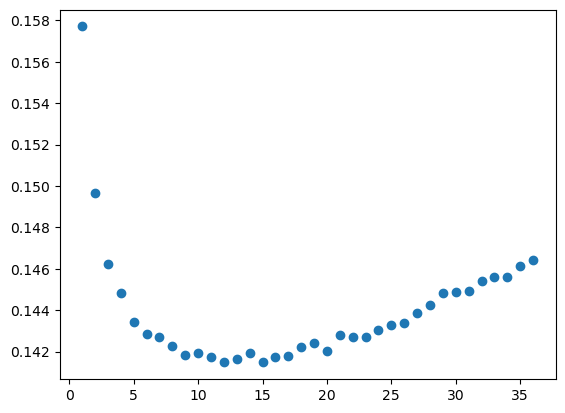

In [12]:
# Plot scatterplot of x = alpha, y = estimated 
plt.plot(parameters['max_features'], np.sqrt(-model_RF_CV_values.cv_results_['mean_test_score']), 'o')